In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyts

In [ ]:
import scipy.io
from pprint import pprint
import json

In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/content/drive/MyDrive/realisation/dataset-csv/BA_innerrace.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print("Contents of the CSV file:")
print(df)


Contents of the CSV file:
     resultat
0    0.064661
1   -0.023096
2   -0.088522
3   -0.093632
4   -0.076491
..        ...
102  0.070415
103  0.078463
104  0.054844
105  0.109446
106  0.076049

[107 rows x 1 columns]


In [ ]:
import numpy as np

# Access the 'X146_BA_time' variable
ba_time_data = df['resultat']

# Flatten the 2D array into a 1D numerical series
ba_time_series = np.ravel(ba_time_data)

# Print the numerical series
print("X146_BA_time series:")
print(ba_time_series)

X146_BA_time series:
[ 0.06466148 -0.02309626 -0.08852225 -0.0936324  -0.07649128 -0.01005935
  0.06273009  0.06397745  0.0595111   0.07922742  0.00716226 -0.04023739
 -0.01170908 -0.0105422  -0.03021828  0.00619656  0.02450457  0.03524795
  0.04880795  0.05291217 -0.05681519 -0.10852024 -0.01822754  0.01231264
  0.07069709  0.1432451   0.11580321  0.07741674 -0.00241424 -0.06212653
 -0.0794286  -0.02921234 -0.02844783 -0.03894979  0.02470576  0.03520772
 -0.05544712 -0.03504677 -0.03379941  0.10075442  0.07395632  0.00325923
  0.04768131  0.00374208  0.03617341  0.00245448  0.01396237  0.0125943
 -0.00869128 -0.03472487 -0.03396036  0.00788653 -0.04059952  0.02937329
  0.02221104  0.01295644  0.07902623  0.01050196  0.02728095  0.03315561
 -0.0379841   0.01750326 -0.04023739  0.05544712 -0.00913389  0.01529021
 -0.00313852 -0.11185994 -0.00619656 -0.03029875  0.01601448  0.1504476
 -0.10674979 -0.00181068  0.09604665  0.05351573 -0.00181068  0.03098279
  0.02977567 -0.04184688 -0.0096

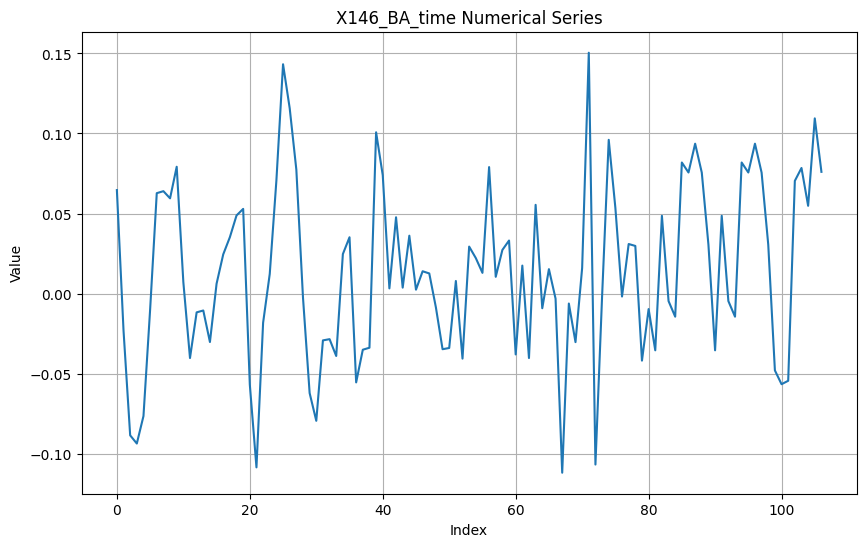

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined ba_time_series as described in the previous response

# Plot the numerical series
plt.figure(figsize=(10, 6))
plt.plot(ba_time_series)
plt.title('X146_BA_time Numerical Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

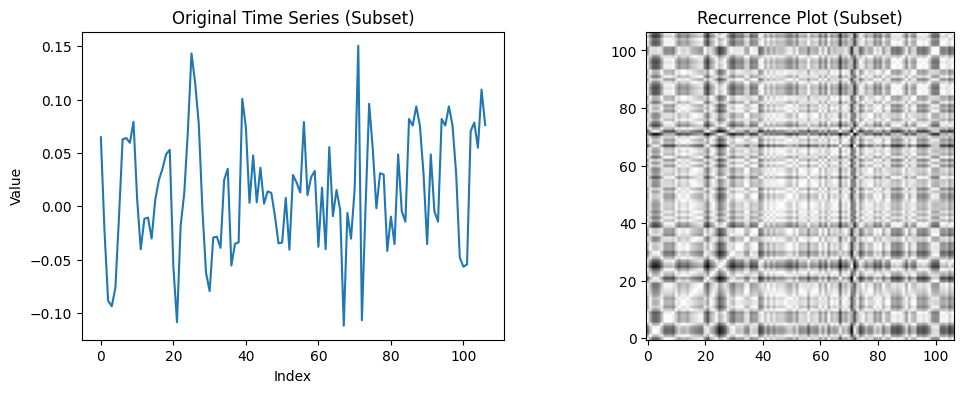

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

# Assuming you have already loaded the time series data into ba_time_series

# Parameters for Recurrence Plot
dimension = 1  # Embedding dimension
time_delay = 1  # Time delay
percentage = 10  # Percentage of recurrence

# Take only the first 2048 values of the time series
ba_time_series_subset = ba_time_series

# Reshape the subset of the time series data to a 2D array
ba_time_series_subset_2d = ba_time_series_subset.reshape(1, -1)

# Create Recurrence Plot
rp = RecurrencePlot(dimension=dimension, time_delay=time_delay, percentage=percentage)
ba_time_rp = rp.fit_transform(ba_time_series_subset_2d)

# Plot the original time series subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ba_time_series_subset)
plt.title('Original Time Series (Subset)')
plt.xlabel('Index')
plt.ylabel('Value')

# Plot the Recurrence Plot for the subset
plt.subplot(1, 2, 2)
plt.imshow(ba_time_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot (Subset)')
plt.show()



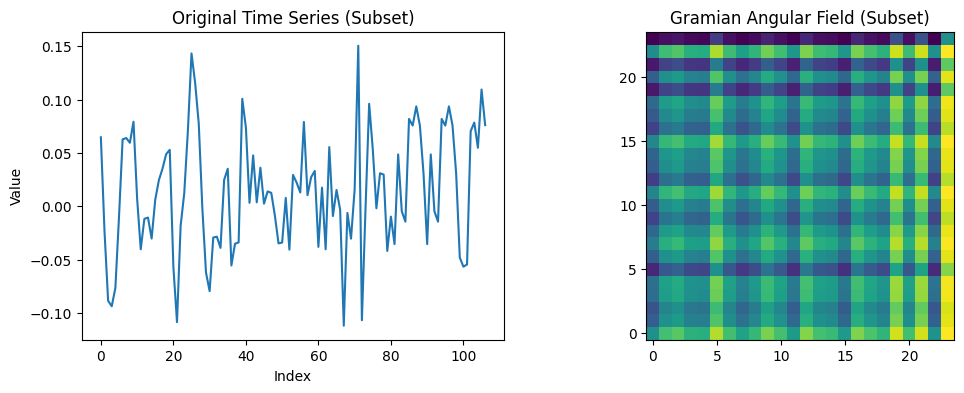

In [ ]:

#gramian
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Assuming you have already loaded the time series data into ba_time_series

# Parameters for GAF
image_size = 24  # Set the size of the image (e.g., 24x24)
method = 'difference'  # 'summation' or 'difference'
sample_range = (0, 1)  # Range of the time series values for normalization

# Take only the first 2048 values of the time series
ba_time_series_subset = ba_time_series

# Reshape the subset of the time series data to a 2D array
ba_time_series_subset_2d = ba_time_series_subset.reshape(1, -1)

# Create Gramian Angular Field
gaf = GramianAngularField(image_size=image_size, method=method, sample_range=sample_range)
ba_time_gaf = gaf.fit_transform(ba_time_series_subset_2d)

# Plot the original time series subset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ba_time_series_subset)
plt.title('Original Time Series (Subset)')
plt.xlabel('Index')
plt.ylabel('Value')

# Plot the Gramian Angular Field for the subset
plt.subplot(1, 2, 2)
plt.imshow(ba_time_gaf[0], cmap='viridis', origin='lower')
plt.title('Gramian Angular Field (Subset)')
plt.show()


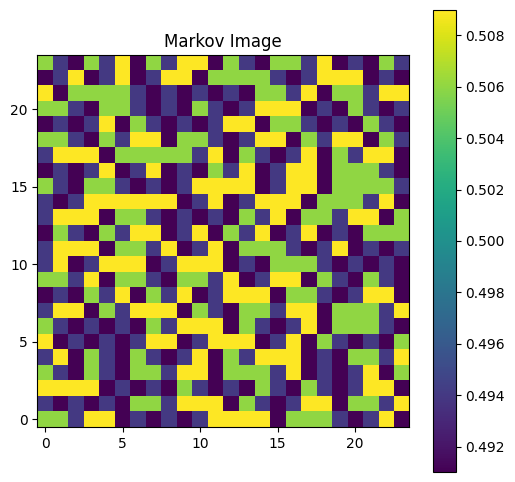

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose ba_time_series is your time series data
ba_time_series = np.random.randn(1000)  # Example time series data

# Parameters for conversion
n_states = 2  # Number of states
image_size = 24  # Size of the resulting image
n_intervals = len(ba_time_series) // image_size  # Number of intervals based on image size

# Convert the time series into states
states = np.zeros(len(ba_time_series), dtype=int)
for i in range(n_intervals):
    interval = ba_time_series[i * image_size : (i+1) * image_size]
    interval_mean = np.mean(interval)
    states[i * image_size : (i+1) * image_size] = np.where(interval < interval_mean, 0, 1)

# Calculate transition probabilities
transition_matrix = np.zeros((n_states, n_states))
for i in range(len(states) - 1):
    transition_matrix[states[i], states[i+1]] += 1

# Normalize transition matrix
row_sums = transition_matrix.sum(axis=1)
transition_matrix = transition_matrix / row_sums[:, np.newaxis]

# Generate the Markov image
markov_image = np.zeros((image_size, image_size))
current_state = states[0]
for i in range(image_size):
    for j in range(image_size):
        markov_image[i, j] = transition_matrix[current_state, states[min(i * image_size + j, len(states)-1)]]
        current_state = states[min(i * image_size + j, len(states)-1)]

# Plot the Markov image
plt.figure(figsize=(6, 6))
plt.imshow(markov_image, cmap='viridis', origin='lower')
plt.title('Markov Image')
plt.colorbar()
plt.show()


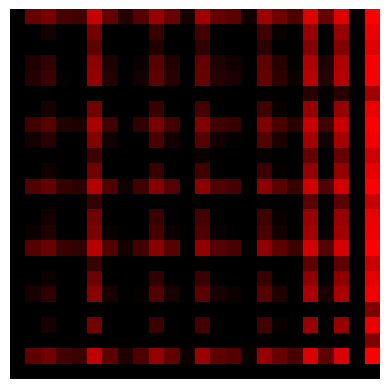

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Supposons que vous avez déjà chargé vos données dans ba_time_series
# et que vous avez créé votre image Gramian Angular Field ba_time_gaf

# Utiliser l'image GAF comme canal rouge
red_channel = ba_time_gaf[0]

# Créer une image RGB où le canal rouge correspond à l'image GAF
rgb_image0 = np.stack([red_channel, np.zeros_like(red_channel), np.zeros_like(red_channel)], axis=2)

# Afficher l'image RGB sans échelle et sans titre
plt.imshow(rgb_image0)
plt.axis('off')  # Supprimer les axes
plt.title('')    # Supprimer le titre
plt.show()


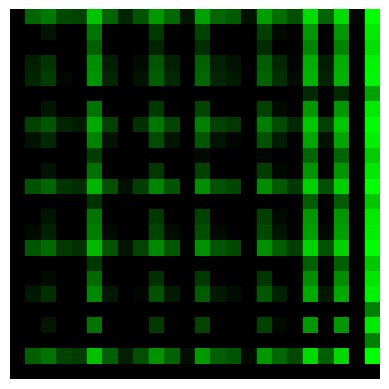

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Supposons que vous avez déjà chargé vos données dans ba_time_series
# et que vous avez créé votre image Gramian Angular Field ba_time_gaf

# Utiliser l'image GAF comme canal vert
green_channel = ba_time_gaf[0]

# Créer une image RGB où le canal vert correspond à l'image GAF
rgb_image1 = np.stack([np.zeros_like(green_channel), green_channel, np.zeros_like(green_channel)], axis=2)

# Afficher l'image RGB
plt.imshow(rgb_image1)
plt.title('')
plt.axis('off')
plt.show()


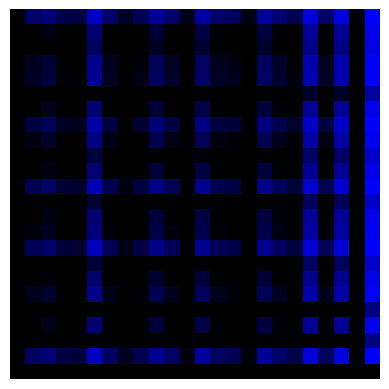

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Supposons que vous avez déjà chargé vos données dans ba_time_series
# et que vous avez créé votre image Gramian Angular Field ba_time_gaf

# Utiliser l'image GAF comme canal bleu
blue_channel = ba_time_gaf[0]

# Créer une image RGB où le canal bleu correspond à l'image GAF
rgb_image2 = np.stack([np.zeros_like(blue_channel), np.zeros_like(blue_channel), blue_channel], axis=2)

# Afficher l'image RGB
plt.imshow(rgb_image2)
plt.title('')
plt.axis('off')
plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Supposons que vous avez déjà chargé vos données dans ba_time_series
# et que vous avez créé votre image Gramian Angular Field ba_time_gaf

# Utiliser l'image GAF comme canal bleu
blue_channel = ba_time_gaf[0]

# Créer une image RGB où le canal bleu correspond à l'image GAF
rgb_image2 = np.stack([np.zeros_like(blue_channel), np.zeros_like(blue_channel), blue_channel], axis=2)

# Multiplier chaque valeur de pixel par 255 pour le canal bleu
blue_channel_values_255 = rgb_image2[:, :, 2] * 255

# Afficher les valeurs des pixels du canal bleu après multiplication
print("Valeurs des pixels pour le canal bleu (entre 0 et 255) :\n", blue_channel_values_255)


Valeurs des pixels pour le canal bleu (entre 0 et 255) :
 [[ 0.00000000e+00  1.01978206e+02  1.21729105e+02  7.36458816e+01
   6.65173965e+01  1.96691713e+02  1.01551405e+02  3.87526266e+01
   8.45883329e+01  1.51900306e+02  1.04820519e+02  2.21119264e+01
   1.60322816e+02  1.02096257e+02  9.13762867e+01  1.81708271e+01
   1.57144511e+02  1.11195293e+02  7.86857666e+01  2.20292903e+02
   1.01365247e+02  2.20292903e+02  6.85605904e+00  2.55000000e+02]
 [-1.01978206e+02  0.00000000e+00  2.19625613e+01 -3.01323194e+01
  -3.74809019e+01  1.15376970e+02 -4.65473239e-01 -6.52749086e+01
  -1.86743796e+01  5.73140374e+01  3.10936373e+00 -8.13273441e+01
   6.76425219e+01  1.28813280e-01 -1.14548563e+01 -8.50644520e+01
   6.37184255e+01  1.01443330e+01 -2.48821514e+01  1.50546214e+02
  -6.68383314e-01  1.50546214e+02 -9.56574024e+01  2.33720871e+02]
 [-1.21729105e+02 -2.19625613e+01  0.00000000e+00 -5.18290394e+01
  -5.90656501e+01  9.53623511e+01 -2.24262683e+01 -8.62631682e+01
  -4.05085766e+0

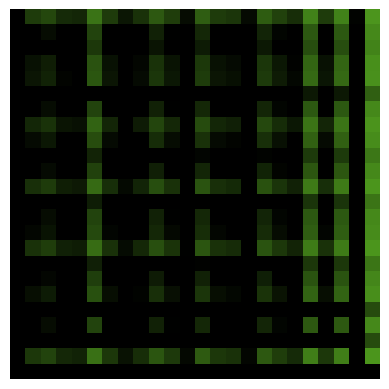

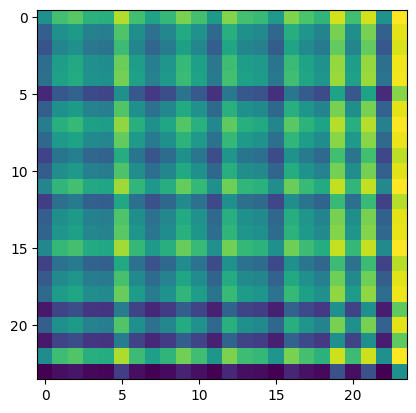

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Charger les trois images en niveaux de bleu, vert et rouge
blue_image = cv2.imread('/content/drive/MyDrive/realisation/image/blue.png', cv2.IMREAD_GRAYSCALE)
green_image = cv2.imread('/content/drive/MyDrive/realisation/image/green.png', cv2.IMREAD_GRAYSCALE)
red_image = cv2.imread('//content/drive/MyDrive/realisation/image/red.png', cv2.IMREAD_GRAYSCALE)

# Fusionner les trois canaux pour créer une image RGB
rgb_image = cv2.merge([blue_image, green_image, red_image])

# Afficher l'image fusionnée
cv2_imshow(rgb_image)
plt.imshow(ba_time_gaf[0])
plt.show()



In [ ]:
import pandas as pd

# Chemin du fichier CSV
chemin_fichier = "/content/drive/MyDrive/realisation/dataset-csv/IR007_0.csv"  # Remplacez "nom_du_fichier.csv" par le nom de votre fichier CSV

# Lecture du fichier CSV
dataframe = pd.read_csv(chemin_fichier)

# Affichage des premières lignes du DataFrame pour vérification
print("Les premières lignes du DataFrame :\n", dataframe)


Les premières lignes du DataFrame :
         X146_BA_time  X146_FE_time  X146_DE_time
0           0.064661     -0.402075     -0.083004
1          -0.023096     -0.004725     -0.195734
2          -0.088522     -0.106631      0.233419
3          -0.093632     -0.074169      0.103958
4          -0.076491      0.208947     -0.181115
...              ...           ...           ...
121260      0.010421     -0.078484      0.324545
121261      0.038306     -0.012327      0.142456
121262      0.096489      0.315989     -0.316424
121263      0.084056      0.350916     -0.063675
121264     -0.020159      0.033078      0.267368

[121265 rows x 3 columns]


In [43]:
import os
import pandas as pd

# Chemin du fichier CSV
chemin_fichier = "/content/drive/MyDrive/realisation/dataset-csv/IR007_0.csv"  # Remplacez "nom_du_fichier.csv" par le nom de votre fichier CSV

# Lecture du fichier CSV
dataframe = pd.read_csv(chemin_fichier)

# Nom du dossier de sortie
dossier_sortie = "/content/drive/MyDrive/realisation/IR007.0(de)"

# Vérifier si le dossier de sortie existe, sinon le créer
if not os.path.exists(dossier_sortie):
    os.makedirs(dossier_sortie)

# Nombre total de lignes dans la colonne X146_BA_time
total_lignes = len(dataframe["X146_DE_time"])

# Compteur pour les fichiers CSV créés
compteur_fichier = 0

# Parcourir la colonne et écrire les données dans les fichiers CSV
for i in range(0, total_lignes, 2048):
    nom_fichier = os.path.join(dossier_sortie, f"ir007.0.{compteur_fichier}.csv")
    sous_dataframe = dataframe["X146_DE_time"].iloc[i:i+2048]
    sous_dataframe.to_csv(nom_fichier, index=False)
    compteur_fichier += 1


In [ ]:

import numpy as np
import pandas as pd

# Chemin du fichier CSV
chemin_fichier = "/content/drive/MyDrive/realisation/IR007.0/ir007.0.0.csv"  # Remplacez "nom_du_fichier.csv" par le nom de votre fichier CSV

# Lecture du fichier CSV
dataframe = pd.read_csv(chemin_fichier)



# Afficher le contenu du fichier avec np.ravel
valeurs = np.ravel(dataframe["X146_BA_time"])
print(valeurs)


[ 0.06466148 -0.02309626 -0.08852226 ... -0.03818528 -0.03408107
 -0.03275323]


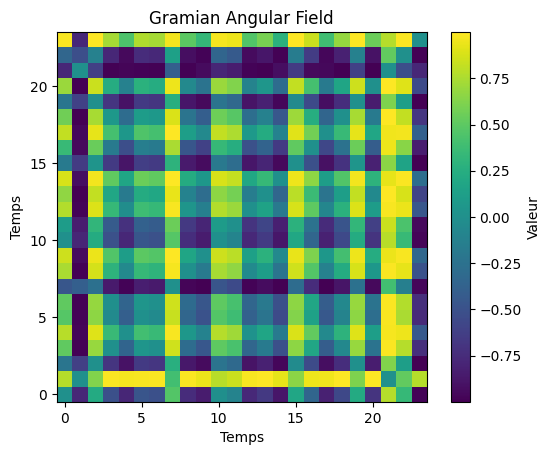

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

# Supposons que vous avez déjà chargé la série temporelle dans la variable 'valeur'

# Paramètres pour le GAF
image_size = 24  # Définir la taille de l'image (par exemple, 24x24)
method = 'difference'  # 'summation' ou 'difference'
sample_range = (-1, 1)  # Plage des valeurs de la série temporelle pour la normalisation

# Réorganiser la série temporelle en un tableau 2D
valeur_2d = valeurs.reshape(1, -1)

# Créer le Gramian Angular Field
gaf = GramianAngularField(image_size=image_size, method=method, sample_range=sample_range)
valeur_gaf = gaf.fit_transform(valeur_2d)

# Tracer le Gramian Angular Field
plt.imshow(valeur_gaf[0], cmap='viridis', origin='lower')
plt.title('Gramian Angular Field')
plt.colorbar(label='Valeur')
plt.xlabel('Temps')
plt.ylabel('Temps')
plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import os

# Chemin du dossier contenant les fichiers CSV
dossier_entree = "/content/drive/MyDrive/realisation/IR007.0(de)/"
dossier_sortie = "/content/drive/MyDrive/realisation/IR007.0(de)/image1/"

# Assurez-vous que le dossier de sortie existe, sinon le créer
if not os.path.exists(dossier_sortie):
    os.makedirs(dossier_sortie)

# Paramètres pour le GAF
image_size = 64 # Définir la taille de l'image (par exemple, 24x24)
method = 'difference'  # 'summation' ou 'difference'
sample_range = (-1, 1)  # Plage des valeurs de la série temporelle pour la normalisation

# Boucle sur chaque fichier
for i in range(60):
    # Chemin du fichier CSV
    chemin_fichier = f"{dossier_entree}/ir007.0.{i}.csv"
    # Lecture du fichier CSV
    dataframe = pd.read_csv(chemin_fichier)
    # Sélection de la colonne contenant les valeurs
    valeurs = np.ravel(dataframe["X146_DE_time"])
    # Réorganiser les valeurs en un tableau 2D
    valeur_2d = valeurs.reshape(1, -1)
    # Créer le Gramian Angular Field
    gaf = GramianAngularField(image_size=image_size, method=method, sample_range=sample_range)
    valeur_gaf = gaf.fit_transform(valeur_2d)
    # Enregistrer l'image du Gramian Angular Field
    chemin_image = f"{dossier_sortie}/ir007.0.{i}_GAF.png"
    plt.imsave(chemin_image, valeur_gaf[0], cmap='viridis')


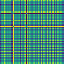

In [47]:
from IPython.display import Image

# Chemin de l'image GAF
chemin_image_gaf = "/content/drive/MyDrive/realisation/IR007.0(fe)/image1/ir007.0.0_GAF.png"  # Remplacez par le chemin de votre image GAF

# Afficher l'image GAF avec une largeur de 800 pixels
Image(chemin_image_gaf, width=800)

